In [2]:
import yfinance as yf
import datetime

end_date_dt = datetime.date.today()
start_date_dt = end_date_dt - datetime.timedelta(days=2*365)

start_date = start_date_dt.strftime('%Y-%m-%d')
end_date = end_date_dt.strftime('%Y-%m-%d')



In [3]:
df_sp500 = yf.download("SPY", start=start_date, end=end_date)
df_sp500 = df_sp500[["Close", "Volume"]]

df_sp500[('Daily Returns', 'SPY')] = df_sp500['Close'].pct_change()
#display(df_sp500.head())
df_sp500[('Monthly Returns', 'SPY')] = df_sp500['Close'].pct_change(periods=21)
#display(df_sp500.head())
df_sp500[('Yearly Returns', 'SPY')] = df_sp500['Close'].pct_change(periods=252)
display(df_sp500.head())

/tmp/ipython-input-1570711195.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_sp500 = yf.download("SPY", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,Volume,Daily Returns,Monthly Returns,Yearly Returns
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2023-09-12,434.427002,67565400,NaN,NaN,NaN
2023-09-13,434.933472,60199300,0.001166,NaN,NaN
2023-09-14,438.683685,83430800,0.008622,NaN,NaN
2023-09-15,433.398285,111848900,-0.012048,NaN,NaN
2023-09-18,433.652405,55752200,0.000586,NaN,NaN


In [4]:
df_GOOGL = yf.download("GOOGL", start=start_date, end=end_date)
df_GOOGL = df_GOOGL[["Close", "Volume"]]
df_GOOGL[('Daily Returns', 'GOOGL')] = df_GOOGL['Close'].pct_change()
#display(df_GOOGL.head())
df_GOOGL[('Monthly Returns', 'GOOGL')] = df_GOOGL['Close'].pct_change(periods=21)
#display(df_GOOGL.head())
df_GOOGL[('Yearly Returns', 'GOOGL')] = df_GOOGL['Close'].pct_change(periods=252)
display(df_GOOGL.head())

/tmp/ipython-input-2967963171.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_GOOGL = yf.download("GOOGL", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,Volume,Daily Returns,Monthly Returns,Yearly Returns
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2023-09-12,134.412949,18405500,NaN,NaN,NaN
2023-09-13,135.773560,20749500,0.010123,NaN,NaN
2023-09-14,137.154053,24751000,0.010168,NaN,NaN
2023-09-15,136.458832,38919600,-0.005069,NaN,NaN
2023-09-18,137.263275,21861300,0.005895,NaN,NaN


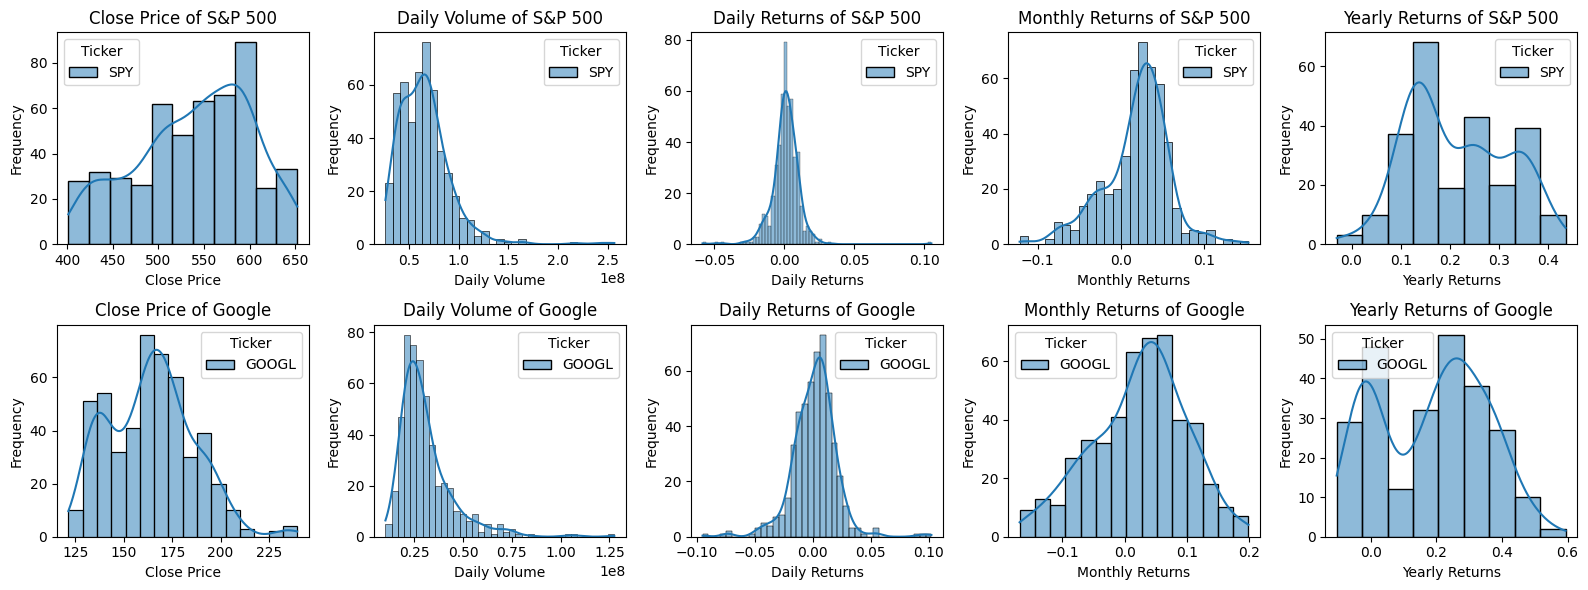

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 5, figsize=(16, 6))

sns.histplot(df_sp500['Close'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Close Price of S&P 500')
axes[0, 0].set_xlabel('Close Price')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df_sp500['Volume'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Daily Volume of S&P 500')
axes[0, 1].set_xlabel('Daily Volume')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df_sp500['Daily Returns'].dropna(), ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Daily Returns of S&P 500')
axes[0, 2].set_xlabel('Daily Returns')
axes[0, 2].set_ylabel('Frequency')

sns.histplot(df_sp500['Monthly Returns'].dropna(), ax=axes[0, 3], kde=True)
axes[0, 3].set_title('Monthly Returns of S&P 500')
axes[0, 3].set_xlabel('Monthly Returns')
axes[0, 3].set_ylabel('Frequency')

sns.histplot(df_sp500['Yearly Returns'].dropna(), ax=axes[0, 4], kde=True)
axes[0, 4].set_title('Yearly Returns of S&P 500')
axes[0, 4].set_xlabel('Yearly Returns')
axes[0, 4].set_ylabel('Frequency')

sns.histplot(df_GOOGL['Close'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Close Price of Google')
axes[1, 0].set_xlabel('Close Price')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df_GOOGL['Volume'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Daily Volume of Google')
axes[1, 1].set_xlabel('Daily Volume')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(df_GOOGL['Daily Returns'].dropna(), ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Daily Returns of Google')
axes[1, 2].set_xlabel('Daily Returns')
axes[1, 2].set_ylabel('Frequency')

sns.histplot(df_GOOGL['Monthly Returns'].dropna(), ax=axes[1, 3], kde=True)
axes[1, 3].set_title('Monthly Returns of Google')
axes[1, 3].set_xlabel('Monthly Returns')
axes[1, 3].set_ylabel('Frequency')

sns.histplot(df_GOOGL['Yearly Returns'].dropna(), ax=axes[1, 4], kde=True)
axes[1, 4].set_title('Yearly Returns of Google')
axes[1, 4].set_xlabel('Yearly Returns')
axes[1, 4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from scipy.stats import skew, kurtosis

statistics_matrix = {}

Variables = ['Close', 'Volume', 'Daily Returns', 'Monthly Returns', 'Yearly Returns']

for i in Variables:
    series_using = df_sp500[i]
    series_using = series_using.squeeze()
    statistics_matrix[f'S&P 500 {i}'] = {
        'Mean': series_using.mean(),
        'Standard Deviation': series_using.std(),
        'Skewness': skew(series_using.dropna()),
        'Kurtosis': kurtosis(series_using.dropna()),
        '5% Quantile': series_using.quantile(0.05),
        '95% Quantile': series_using.quantile(0.95)
    }
for i in Variables:
    series_using = df_GOOGL[i]
    series_using = series_using.squeeze()
    statistics_matrix[f'Google {i}'] = {
        'Mean': series_using.mean(),
        'Standard Deviation': series_using.std(),
        'Skewness': skew(series_using.dropna()),
        'Kurtosis': kurtosis(series_using.dropna()),
        '5% Quantile': series_using.quantile(0.05),
        '95% Quantile': series_using.quantile(0.95)
    }


statistics_matrix = pd.DataFrame.from_dict(statistics_matrix, orient='index')

display(statistics_matrix)

,Mean,Standard Deviation,Skewness,Kurtosis,5% Quantile,95% Quantile
S&P 500 Close,5.393923e+02,6.280350e+01,-0.351802,-0.746462,4.225674e+02,6.352600e+02
S&P 500 Volume,6.533960e+07,2.643354e+07,2.234337,11.053581,3.418380e+07,1.076463e+08
S&P 500 Daily Returns,8.662305e-04,1.036609e-02,1.139458,23.247528,-1.472000e-02,1.381446e-02
S&P 500 Monthly Returns,1.929832e-02,3.915681e-02,-0.489407,1.168682,-5.469311e-02,6.865704e-02
S&P 500 Yearly Returns,2.135950e-01,1.013450e-01,0.212704,-0.942648,7.579805e-02,3.763378e-01
Google Close,1.641071e+02,2.198870e+01,0.358986,0.035072,1.314037e+02,1.995715e+02
Google Volume,3.081125e+07,1.381848e+07,2.313271,8.642552,1.717490e+07,5.749870e+07
Google Daily Returns,1.333653e-03,1.901694e-02,0.003190,5.591763,-2.767105e-02,2.576113e-02
Google Monthly Returns,2.355793e-02,7.538002e-02,-0.293702,-0.287058,-1.140278e-01,1.347897e-01
Google Yearly Returns,1.867614e-01,1.638632e-01,-0.039254,-1.116566,-5.097264e-02,4.352907e-01


/tmp/ipython-input-4141442044.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Google_5Y = yf.download("GOOGL", start=end_date_dt - datetime.timedelta(days=5*365), end=end_date)
[*********************100%***********************]  1 of 1 completed


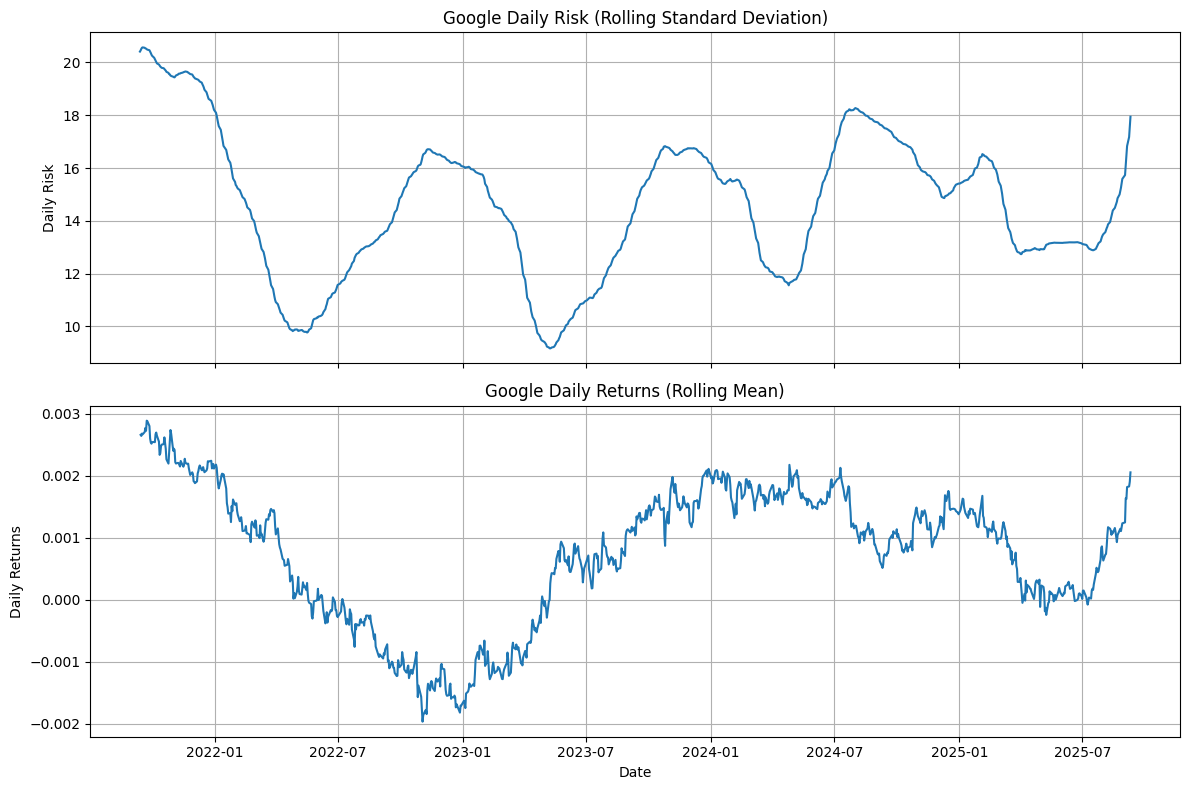

In [7]:
Google_5Y = yf.download("GOOGL", start=end_date_dt - datetime.timedelta(days=5*365), end=end_date)

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axes[0].plot(Google_5Y["Close"].rolling(window=252).std().dropna())
axes[0].set_title('Google Daily Risk (Rolling Standard Deviation)')
axes[0].set_ylabel('Daily Risk')
axes[0].grid(True)

axes[1].plot(Google_5Y['Close'].pct_change().rolling(window=252).mean().dropna())
axes[1].set_title('Google Daily Returns (Rolling Mean)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Returns')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [8]:
tickers = ["GOOGL", "AMZN", "AAPL", "META", "MSFT", "NVDA", "TSLA", "SPY"]

data = {}

for i in tickers:
    data[i] = yf.download(i, start=start_date, end=end_date)

/tmp/ipython-input-512691241.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[i] = yf.download(i, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-512691241.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[i] = yf.download(i, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-512691241.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[i] = yf.download(i, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-512691241.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[i] = yf.download(i, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-512691241.py:6: F

In [9]:
metrics = {}

for i in tickers:
    df = data[i]
    daily_returns = df['Close'].pct_change().dropna().to_numpy()
    avg_daily_return = daily_returns.mean()
    std_dev_daily_return = daily_returns.std()
    metrics[i] = {
        'Mean': avg_daily_return,
        'SD': std_dev_daily_return
    }

metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

display(metrics_df)

,Mean,SD
GOOGL,0.001334,0.018998
AMZN,0.001173,0.019718
AAPL,0.000674,0.017443
META,0.002100,0.023107
MSFT,0.000952,0.014150
NVDA,0.003263,0.031988
TSLA,0.001298,0.039585
SPY,0.000866,0.010356


/tmp/ipython-input-1257425249.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(metrics_df['Mean'][i], metrics_df['SD'][i] + 0.0005, ticker, ha='left', va='center')


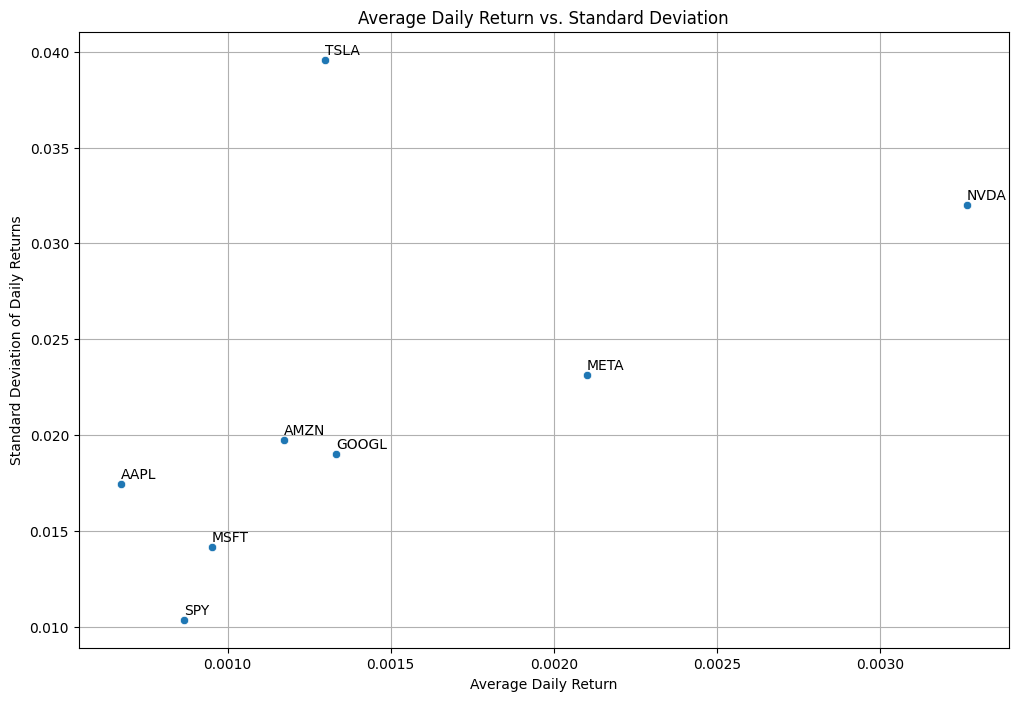

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=metrics_df, x='Mean', y='SD')

for i, ticker in enumerate(metrics_df.index):
    ax.text(metrics_df['Mean'][i], metrics_df['SD'][i] + 0.0005, ticker, ha='left', va='center')

plt.title('Average Daily Return vs. Standard Deviation')
plt.xlabel('Average Daily Return')
plt.ylabel('Standard Deviation of Daily Returns')
plt.grid(True)
plt.show()

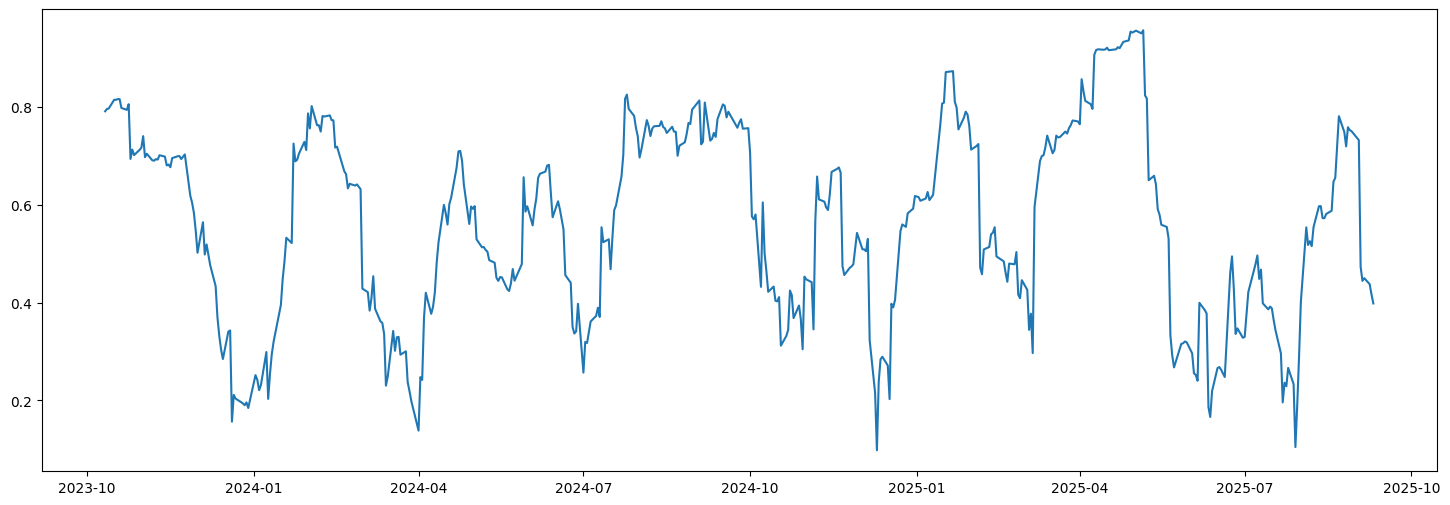

In [11]:
combined = pd.concat([
    df_GOOGL['Daily Returns'],
    df_sp500['Daily Returns']
], axis=1)
combined.columns = ['GOOGL', 'SP500']

rolling_corr = combined['GOOGL'].rolling(window=21).corr(combined['SP500'])

plt.figure(figsize=(18, 6))

plt.plot(rolling_corr.index, rolling_corr.values)

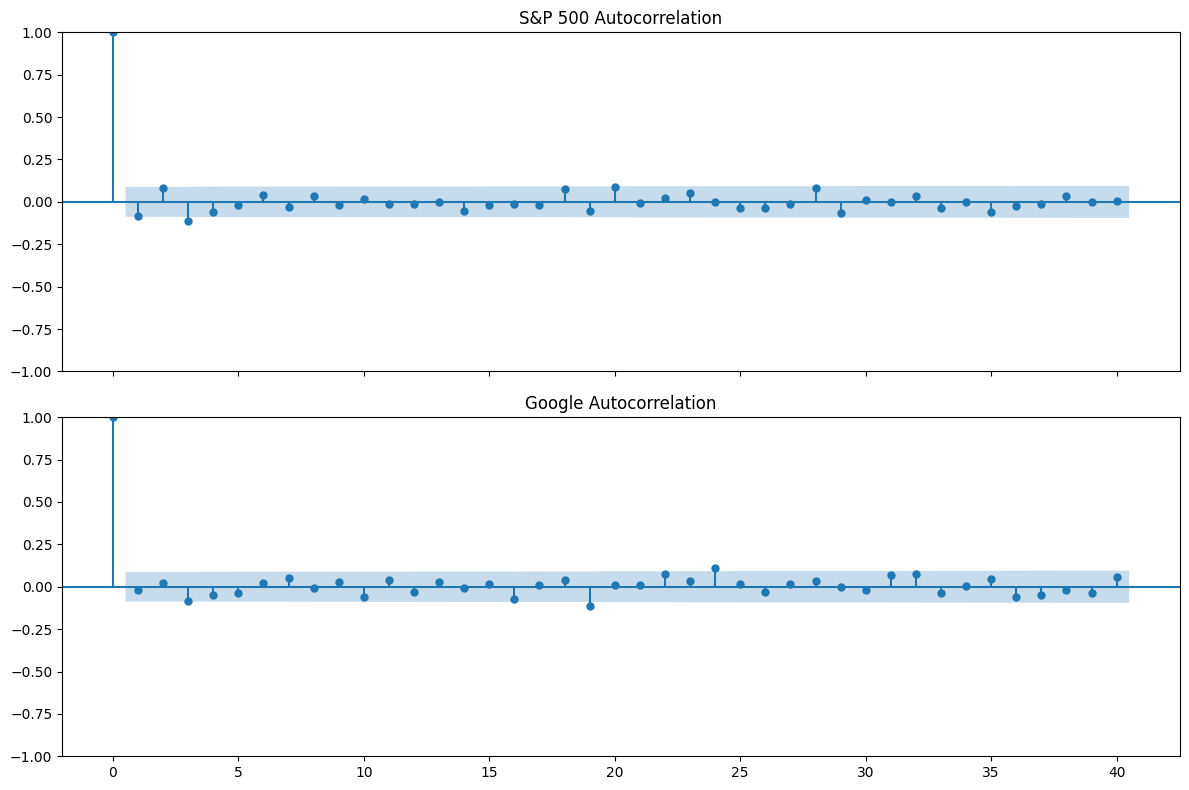

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

plot_acf(df_sp500['Daily Returns'].dropna(), ax=axes[0], lags=40)
axes[0].set_title('S&P 500 Autocorrelation')

plot_acf(df_GOOGL['Daily Returns'].dropna(), ax=axes[1], lags=40)
axes[1].set_title('Google Autocorrelation')

plt.tight_layout()
plt.show()

In [13]:
df_sp500_10Y = yf.download("SPY", start=end_date_dt - datetime.timedelta(days=10*365), end=end_date)

df_sp500_10Y['Daily Returns'] = df_sp500_10Y['Close'].pct_change()

df_sp500_10Y['Month'] = df_sp500_10Y.index.month
df_sp500_10Y['Year'] = df_sp500_10Y.index.year

average_monthly_returns = df_sp500_10Y.groupby(['Year', 'Month'])['Daily Returns'].mean().reset_index()
display(average_monthly_returns)

/tmp/ipython-input-2367277992.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_sp500_10Y = yf.download("SPY", start=end_date_dt - datetime.timedelta(days=10*365), end=end_date)
[*********************100%***********************]  1 of 1 completed


,Year,Month,Daily Returns
0,2015,9,-0.001380
1,2015,10,0.003747
2,2015,11,0.000210
3,2015,12,-0.000729
4,2016,1,-0.002576
...,...,...,...
116,2025,5,0.002960
117,2025,6,0.002527
118,2025,7,0.001044
119,2025,8,0.000995


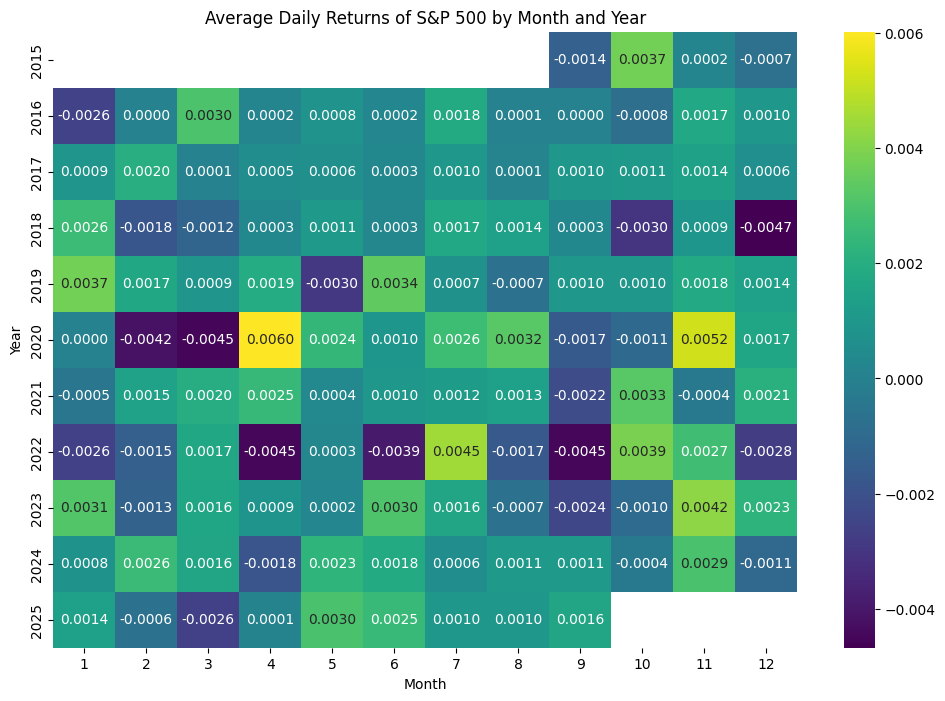

In [14]:
heatmap_data = average_monthly_returns.pivot(index='Year', columns='Month', values='Daily Returns')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis")
plt.title('Average Daily Returns of S&P 500 by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [15]:
sector_etf_tickers = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]

sector_data = {}

for i in sector_etf_tickers:
    sector_data[i] = yf.download(i, start=start_date, end=end_date)
    sector_data[i]['Daily Returns'] = sector_data[i]['Close'].pct_change()

/tmp/ipython-input-1893016432.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sector_data[i] = yf.download(i, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1893016432.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sector_data[i] = yf.download(i, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1893016432.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sector_data[i] = yf.download(i, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1893016432.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sector_data[i] = yf.download(i, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp

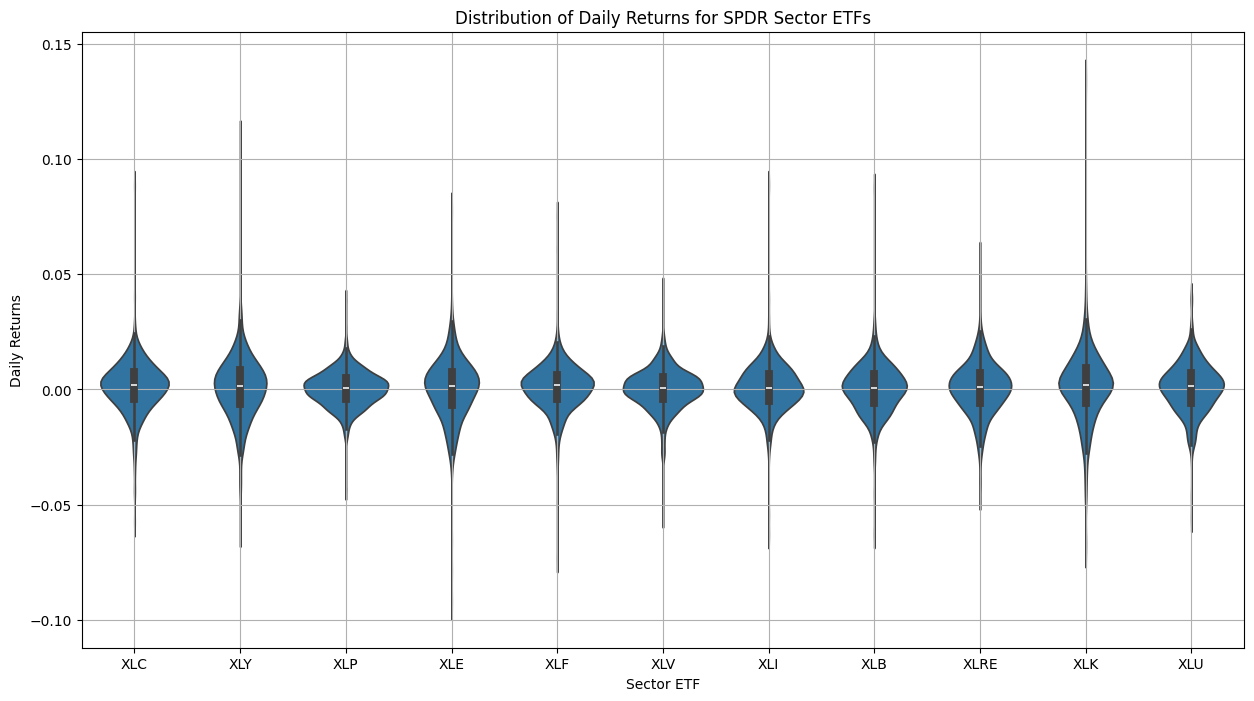

In [16]:
all_returns = []
for i in sector_etf_tickers:
    returns = sector_data[i]['Daily Returns'].dropna()
    returns = returns.reset_index()
    returns['Ticker'] = i
    all_returns.append(returns)

combined_returns_df = pd.concat(all_returns)

plt.figure(figsize=(15, 8))
sns.violinplot(data=combined_returns_df, x='Ticker', y='Daily Returns')
plt.title('Distribution of Daily Returns for SPDR Sector ETFs')
plt.xlabel('Sector ETF')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.show()

In [17]:
metrics = {}

for i in sector_etf_tickers:
    daily_returns = sector_data[i]['Daily Returns'].dropna().to_numpy()
    avg_daily_return = daily_returns.mean()
    std_dev_daily_return = daily_returns.std()
    metrics[i] = {
        'Mean': avg_daily_return,
        'SD': std_dev_daily_return
    }

metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

display(metrics_df)

,Mean,SD
XLC,0.001171,0.011128
XLY,0.000736,0.013705
XLP,0.000355,0.007644
XLE,0.000142,0.013775
XLF,0.000975,0.010615
XLV,0.000172,0.008804
XLI,0.000841,0.010413
XLB,0.000341,0.010864
XLRE,0.000469,0.011453
XLK,0.001068,0.015426


/tmp/ipython-input-3382979404.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(metrics_df['Mean'][i], metrics_df['SD'][i] + 0.0001, ticker, ha='left', va='center')


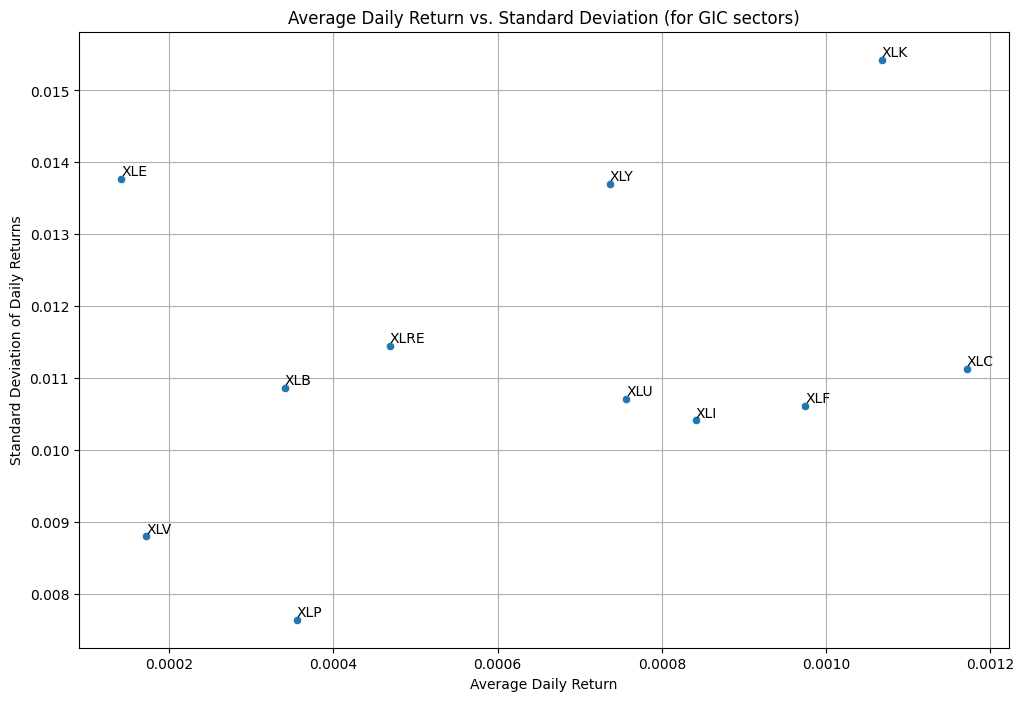

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=metrics_df, x='Mean', y='SD')

for i, ticker in enumerate(metrics_df.index):
    ax.text(metrics_df['Mean'][i], metrics_df['SD'][i] + 0.0001, ticker, ha='left', va='center')

plt.title('Average Daily Return vs. Standard Deviation (for GIC sectors)')
plt.xlabel('Average Daily Return')
plt.ylabel('Standard Deviation of Daily Returns')
plt.grid(True)
plt.show()

/tmp/ipython-input-3241745287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp500_2020['Month'] = pd.Categorical(df_sp500_2020['Month'], categories=range(1, 13), ordered=True)
/tmp/ipython-input-3241745287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp500_2020['Month_Name'] = df_sp500_2020['Month'].apply(lambda x: month_order[x-1])
/usr/local/lib/python3.12/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut

<Figure size 1000x800 with 0 Axes>

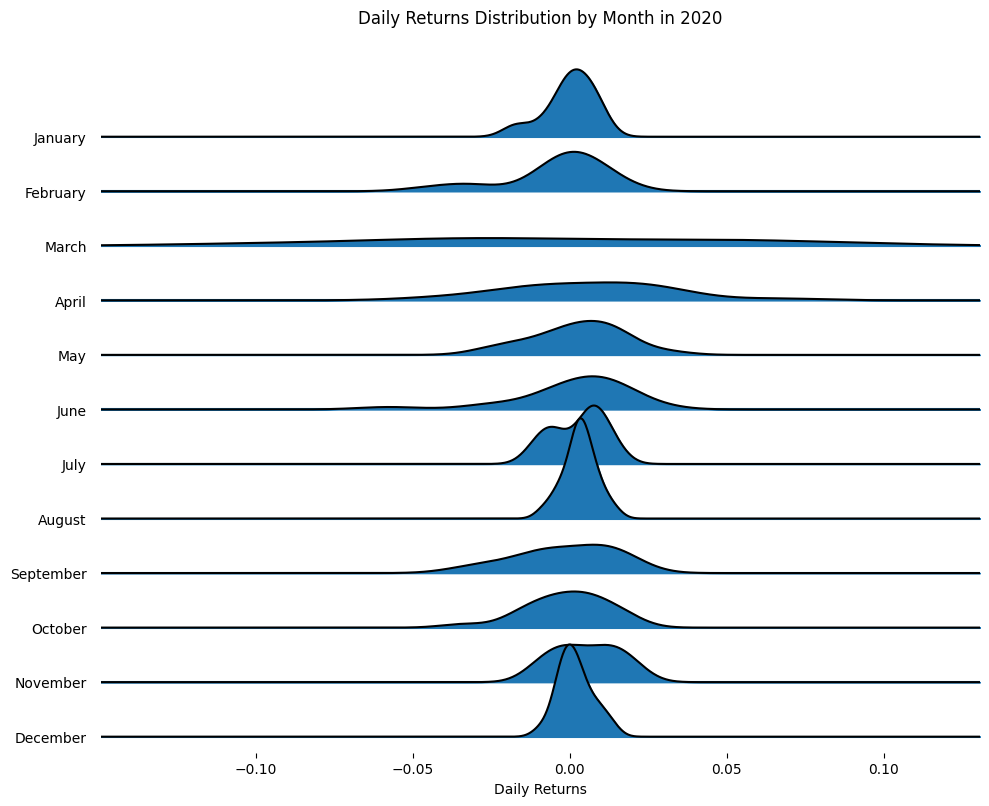

In [19]:
%pip install joypy
import joypy

df_sp500_2020 = df_sp500_10Y[df_sp500_10Y.index.year == 2020]

df_sp500_2020['Month'] = pd.Categorical(df_sp500_2020['Month'], categories=range(1, 13), ordered=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_sp500_2020['Month_Name'] = df_sp500_2020['Month'].apply(lambda x: month_order[x-1])

plt.figure(figsize=(10, 8))
joypy.joyplot(df_sp500_2020, by='Month_Name', column='Daily Returns', figsize=(10, 8), title='Daily Returns Distribution by Month in 2020')
plt.xlabel('Daily Returns')
plt.show()